In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from collections import deque
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
df1 = pd.read_csv('d1.csv')
df2 = pd.read_csv('d2.csv')

# EDA

In [13]:
df1.shape

(1500, 2)

In [20]:
df1.describe()

,x,y
count,1500.000000,1500.000000
mean,-0.000404,-0.003124
std,0.560982,0.560178
min,-1.073246,-1.089297
25%,-0.439400,-0.435870
50%,0.004207,-0.001848
75%,0.440536,0.432520
max,1.070363,1.108384


In [14]:
df2.shape

(1500, 2)

In [21]:
df2.describe()

,x,y
count,1500.000000,1500.000000
mean,0.499596,0.246876
std,0.868453,0.496555
min,-1.095747,-0.613275
25%,-0.038182,-0.214728
50%,0.512167,0.245633
75%,1.031177,0.704654
max,2.109775,1.117095


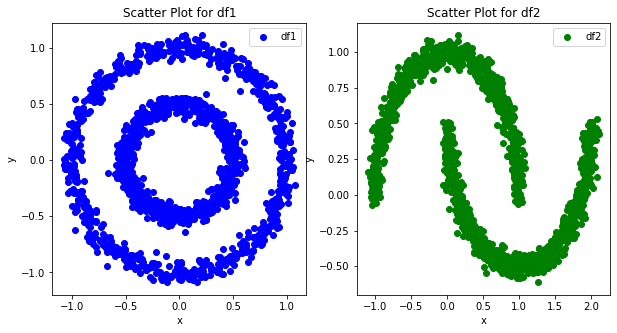

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting df1 on the first subplot with a specific color
ax1.scatter(df1['x'], df1['y'], label='df1', color='blue')
ax1.set_title('Scatter Plot for df1')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(df2['x'], df2['y'], label='df2', color='green')
ax2.set_title('Scatter Plot for df2')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.show()

its better to standardize the data before clustering

In [27]:
scaler1 = StandardScaler()
df1_scaled = pd.DataFrame(scaler1.fit_transform(df1), columns=df1.columns)

scaler2 = StandardScaler()
df2_scaled = pd.DataFrame(scaler2.fit_transform(df2), columns=df2.columns)

In [ ]:
`

### instead of scatter plot we can use pairplot in seaborn, its better for clustering tasks.

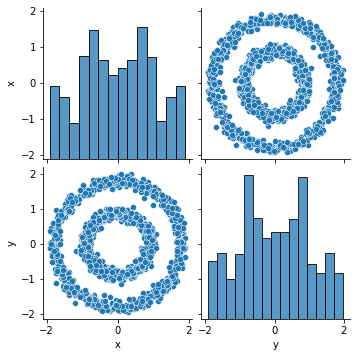

In [28]:
sns.pairplot(df1_scaled)

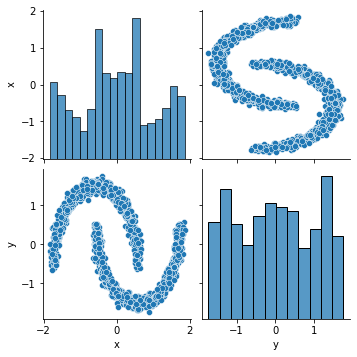

In [30]:
sns.pairplot(df2_scaled)

## implement DBSCAN from scratch

In [53]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit_predict(self, X):
        self.labels = np.zeros(X.shape[0], dtype=int)
        cluster_id = 0

        for i in range(X.shape[0]):
            if self.labels[i] != 0:
                continue

            neighbors = self.get_neighbors(X, i)

            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Mark as noise
            else:
                cluster_id += 1
                self.expand_cluster(X, i, neighbors, cluster_id)

        return self.labels

    def expand_cluster(self, X, current_index, neighbors, cluster_id):
        self.labels[current_index] = cluster_id

        for neighbor_index in neighbors:
            if self.labels[neighbor_index] == -1:
                self.labels[neighbor_index] = cluster_id
            elif self.labels[neighbor_index] == 0:
                self.labels[neighbor_index] = cluster_id
                new_neighbors = self.get_neighbors(X, neighbor_index)

                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)

    def get_neighbors(self, X, index):
        distances = np.linalg.norm(X - X[index], axis=1)
        return [i for i, dist in enumerate(distances) if dist <= self.eps]



## this function plot the clustered data

In [ ]:
def plot_clusters(df, labels, title):
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        if label == -1:
            plt.scatter(df['x'][labels == label], df['y'][labels == label], c='purple', label='Noise')
        else:
            plt.scatter(df['x'][labels == label], df['y'][labels == label], c=[color], label=f'Cluster {label}')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

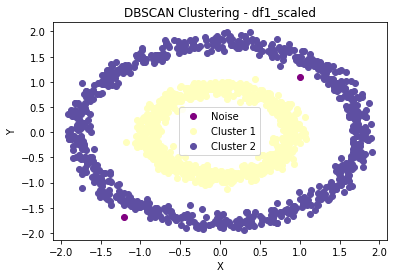

In [54]:
dbscan1 = DBSCAN(eps=0.2, min_samples=3)
labels1 = dbscan1.fit_predict(df1_scaled.values)
plot_clusters(df1_scaled, labels1, title='DBSCAN Clustering - df1_scaled')

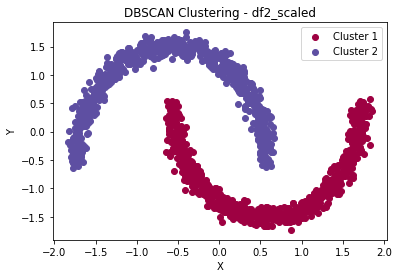

In [55]:
dbscan2 = DBSCAN(eps=0.5, min_samples=3)
labels2 = dbscan2.fit_predict(df2_scaled.values)
plot_clusters(df2_scaled, labels2, title='DBSCAN Clustering - df2_scaled')